# Week 4 Excercises
Joshua Burden  
DSC530 Week 4  
Bellevue University  
Catherine Williams  
06/26/2022

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Downloaded thinkstats2.py
Downloaded thinkplot.py
Downloaded nsfg.py
Downloaded first.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [14]:
import numpy as np
import nsfg 
import first
import thinkstats2
import thinkplot
from empyrical_dist import Pmf

In [3]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

# Exercise 3.1: 
Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable numkdhh to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [6]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

Downloaded 2002FemResp.dct
Downloaded 2002FemResp.dat.gz


In [19]:
resp = nsfg.ReadFemResp()

# select the numkdhh col for pmf
pmf = Pmf.from_seq(resp.numkdhh)
pmf

,probs
0,0.466178
1,0.214052
2,0.196258
3,0.087139
4,0.025644
5,0.010729


In [20]:
pmf = thinkstats2.Pmf(resp.numkdhh, label="numkdhh")

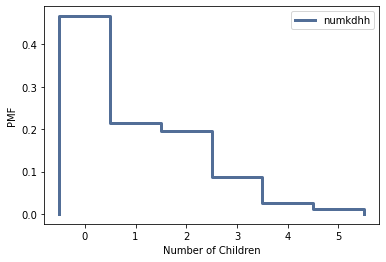

In [21]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel = "Number of Children", ylabel= "PMF")

In [25]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf


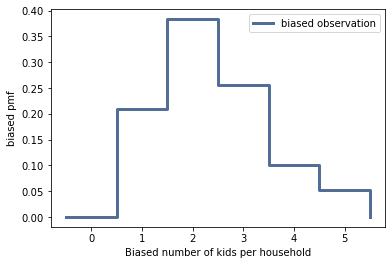

In [27]:
biased_pmf = BiasPmf(pmf, label = "biased observation")
thinkplot.Pmf(biased_pmf)
thinkplot.Config(xlabel="Biased number of kids per household", ylabel="biased pmf")

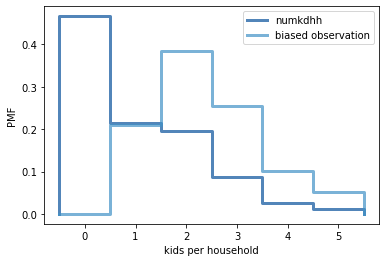

<Figure size 576x432 with 0 Axes>

In [29]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel="kids per household", ylabel = "PMF")

# Excercise 3.2

Exercise 3.2 In Section 2.7 we computed the mean of a sample by adding
up the elements and dividing by n. If you are given a PMF, you can still
compute the mean, but the process is slightly different:
x¯ =
X
i
pi xi
where the xi are the unique values in the PMF and pi = PMF(xi). Similarly,
you can compute variance like this:



$$
S^2 = Xipi (xi − x¯)^2

$$

Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are
consistent with the methods Mean and Var provided by Pmf.


In [35]:
pmf.Mean()

1.024205155043831

In [33]:
biased_pmf.Mean()

2.403679100664282

In [44]:
def PmfMean(pmf):
    ans = 0
    for x, p in pmf.Items():
        temp = x * p 
        ans += temp
        
    return ans

PmfMean(pmf)

1.024205155043831

In [47]:
print("the mean from PmfMean is {:.2f}".format(PmfMean(pmf)))

the mean from PmfMean is 1.02


In [45]:
def PmfVar(pmf):
    ans = 0
    for x, p in pmf.Items():
        temp = p * (x - PmfMean(pmf)) ** 2
        ans += temp
    return ans

PmfVar(pmf)

1.4128643263531195

In [46]:
print("The var from the Pmf function is {:.2f}".format(PmfVar(pmf)))

The var from the Pmf function is 1.41


# Exercise 4.1 
How much did you weigh at birth? If you don’t know, call your
mother or someone else who knows. Using the NSFG data (all live births),
compute the distribution of birth weights and use it to find your percentile
rank. If you were a first baby, find your percentile rank in the distribution
for first babies. Otherwise use the distribution for others. If you are in the
90th percentile or higher, call your mother back and apologize.


In [57]:
my_wgt = 10.3

In [58]:
live, firsts, others = first.MakeFrames()

first_wgt_dropna = firsts.totalwgt_lb.dropna()

def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')



In [64]:
print("I was was born in the {:.1f}".format(first_cdf.PercentileRank(my_wgt)) + " precentile at " + str(my_wgt) +  " pounds.")

I was was born in the 98.9 precentile at 10.3 pounds.


# Exercise 4.2 
The numbers generated by random.random are supposed to be
uniform between 0 and 1; that is, every value in the range should have the
same probability.

Generate 1000 numbers from random.random and plot their PMF and CDF.
Is the distribution uniform?

In [69]:
import matplotlib.pyplot as plt

In [70]:
rand_num = np.random.random(1000)
rand_num

array([0.08332335, 0.63414178, 0.4384031 , 0.07146277, 0.64666405,
       0.271877  , 0.18375121, 0.25421285, 0.69830633, 0.66903513,
       0.97363963, 0.01163131, 0.23262581, 0.7080411 , 0.61153076,
       0.08228386, 0.38856905, 0.34427014, 0.92580421, 0.50947594,
       0.97977952, 0.54573932, 0.06213501, 0.0650552 , 0.97831082,
       0.37432386, 0.53812217, 0.07659133, 0.18908291, 0.58204208,
       0.4611467 , 0.08328962, 0.40271617, 0.33361185, 0.74353804,
       0.6500434 , 0.07795635, 0.43250175, 0.62663751, 0.97185695,
       0.71464121, 0.36620196, 0.81949237, 0.4603275 , 0.58435681,
       0.67334509, 0.03424459, 0.70485946, 0.33839921, 0.26153741,
       0.94261583, 0.88727833, 0.45864609, 0.7184131 , 0.12098013,
       0.62223811, 0.00950223, 0.1612672 , 0.3399884 , 0.92962681,
       0.72473227, 0.34441083, 0.84041424, 0.50360509, 0.39661259,
       0.38438586, 0.85683474, 0.70660569, 0.312877  , 0.836058  ,
       0.45600948, 0.11110029, 0.05751118, 0.99112355, 0.66384

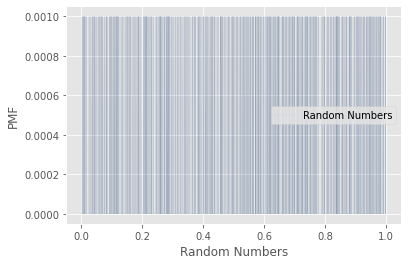

In [79]:
#PMF
pmf = thinkstats2.Pmf(rand_num, label="Random Numbers")
thinkplot.Pmf(pmf, linewidth = .05)
thinkplot.Config(xlabel="Random Numbers", ylabel= "PMF")

Would seem this is very hard to determine if this data is actually useful with how cluttered it is.

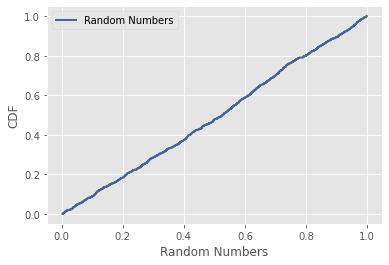

In [85]:
# CDF
cdf = thinkstats2.Cdf(rand_num, label = "Random Numbers")
thinkplot.Cdf(cdf, linewidth = 2)
thinkplot.Config(xlabel = "Random Numbers", ylabel = "CDF")

Data from the cdf appears to be uniform as it forms a straight line for CDF